# 🍄 Is mushroom edible?

### About shrooms

Mushrooms are a type of fungi, which are diverse organisms that are neither plant nor animal. They belong to the kingdom Fungi, which also includes yeasts, molds, and other types of fungi. Fungi are characterized by their unique mode of nutrition, which involves absorbing nutrients from organic matter in their environment.

Mushrooms are known for their fruiting bodies, which are the visible part of the organism that we commonly refer to as "mushrooms." These fruiting bodies are actually the reproductive structures of the mushroom organism, and they produce spores that can be dispersed to other areas to start new fungal growth.

The actual body of the mushroom, called the mycelium, is a mass of thread-like structures called hyphae that grow underground or within other substrates. The mycelium is responsible for absorbing nutrients from the environment and breaking down organic matter, which is then used to support the growth and development of the fruiting bodies.

Mushrooms come in many different shapes, sizes, and colors, and they can be found in a variety of habitats, including forests, fields, and even on decaying wood or other organic matter. Some mushrooms are edible and are used in culinary applications, while others are poisonous and can cause illness or even death if ingested.

We have a really big, that is 8 thousand rows and 23 columns of data about shrooms. One of which tells us if they are edible for us or not. Since there are a lot of them, and we still discover more species, it would be nice if we had something that would tell us if this newly discovered mushroom could revolutionize our cuisine. For that we will use the POWER OF AI (mostly some statistical algorithms and a neural network, but AI nonetheless)!

### About our data

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be" for Poisonous Oak and Ivy.

Here is how it looks:

| Feature                  | Options                                                                                                                              |
| ------------------------ | ------------------------------------------------------------------------------------------------------------------------------------ |
| cap-shape                | bell = b, conical = c, convex = x, flat = f, knobbed = k, sunken = s                                                                 |
| cap-surface              | fibrous = f, grooves = g, scaly = y, smooth = s                                                                                      |
| cap-color                | brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple = u, red = e, white = w, yellow = y                         |
| bruises?                 | bruises = t, no = f                                                                                                                  |
| odor                     | almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s                                |
| gill-attachment          | attached = a, descending = d, free = f, notched = n                                                                                  |
| gill-spacing             | close = c, crowded = w, distant = d                                                                                                  |
| gill-size                | broad = b, narrow = n                                                                                                                |
| gill-color               | black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w, yellow = y |
| stalk-shape              | enlarging = e, tapering = t                                                                                                          |
| stalk-root               | bulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?                                                  |
| stalk-surface-above-ring | fibrous = f, scaly = y, silky = k, smooth = s                                                                                        |
| stalk-surface-below-ring | fibrous = f, scaly = y, silky = k, smooth = s                                                                                        |
| stalk-color-above-ring   | brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y                                    |
| stalk-color-below-ring   | brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y                                    |
| veil-type                | partial = p, universal = u                                                                                                           |
| veil-color               | brown = n, orange = o, white = w, yellow = y                                                                                         |
| ring-number              | none = n, one = o, two = t                                                                                                           |
| ring-type                | cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone = z                                 |
| spore-print-color        | black = k, brown = n, buff = b, chocolate = h, green = r, orange = o, purple = u, white = w, yellow = y                              |
| population               | abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y                                                  |
| habitat                  | grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d                                                     |
| poisonous                | edible = e, poisonous = p                                                                                                            |

The data is free of errors but has some of the data missing. Every column is complete but the `stalk-root` which has something about 2400 records missing. Still the data is good and we can do some things with it to improve it.


In [1]:
# We import everything we will need to work with the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Import the data
data = pd.read_csv('mushrooms.csv')

We have to do something about the data because it has 2400 records missing in one column. We can either make a complicated guess about the value and input it. Oooooooor simply delete it. We will do just that. Of course we will lose a lot of data but this is a sacrifice I am willing to make.


In [3]:
data = data[data['stalk-root'] != '?']

In [4]:
# Making it more usable for us
# First we change the labels to numbers
# We do this with mapping the letters into it's ord value
data = data.applymap(lambda s: ord(s) - ord('a'))

In [5]:
# Check if we performed the mapping correctly, we should only get non negative values
for column in data.columns:
    print(
        f"Range of values for {column}: {data[column].min()} - {data[column].max()}")


Range of values for class: 4 - 15
Range of values for cap-shape: 1 - 23
Range of values for cap-surface: 5 - 24
Range of values for cap-color: 1 - 24
Range of values for bruises: 5 - 19
Range of values for odor: 0 - 15
Range of values for gill-attachment: 0 - 5
Range of values for gill-spacing: 2 - 22
Range of values for gill-size: 1 - 13
Range of values for gill-color: 6 - 24
Range of values for stalk-shape: 4 - 19
Range of values for stalk-root: 1 - 17
Range of values for stalk-surface-above-ring: 5 - 24
Range of values for stalk-surface-below-ring: 5 - 24
Range of values for stalk-color-above-ring: 1 - 24
Range of values for stalk-color-below-ring: 1 - 24
Range of values for veil-type: 15 - 15
Range of values for veil-color: 22 - 24
Range of values for ring-number: 13 - 19
Range of values for ring-type: 4 - 15
Range of values for spore-print-color: 7 - 22
Range of values for population: 0 - 24
Range of values for habitat: 3 - 20


Now that we changed this perfectly understandable table in to non readable gibberish (called math) we can feed it to the computer since it what it only understands numbers.

In case of transforming our data we will go a step further! We will map our 1-9 values to a range of 0-1. Since neural networks are better fit to work on this range. We will than throw two datasets at it and compare them.


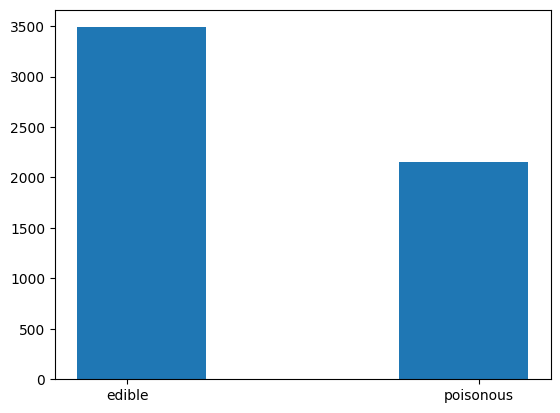

In [6]:
# Plotting the amount of edible and poisonous mushrooms that are left in the dataset
plt.hist(data['class'], bins=2, rwidth=0.4)
plt.xticks([6.5, 12.5], ['edible', 'poisonous'])
plt.show()


By deleting all of the rows with missing the split does not look so good. Since we do not have a near 50/50 split our algorithms could be more susceptible to guessing that the mushroom is edible. Since that is the greater group in our data set.

By the way we deleted something like 52 800 of data points.

Nevertheless we continue to splitting our data into test and train sets and we will also perform a decision tree classification. We will get back to our data later and try to process it better.


In [7]:
# We split our data into values and answers
values = data.drop('class', axis=1)
answers = data['class']

# We split our data into train and test data
values_train, values_test, answers_train, answers_test = train_test_split(
    values, answers, test_size=0.7, random_state=278805)

## 🌳 Performing tree classification


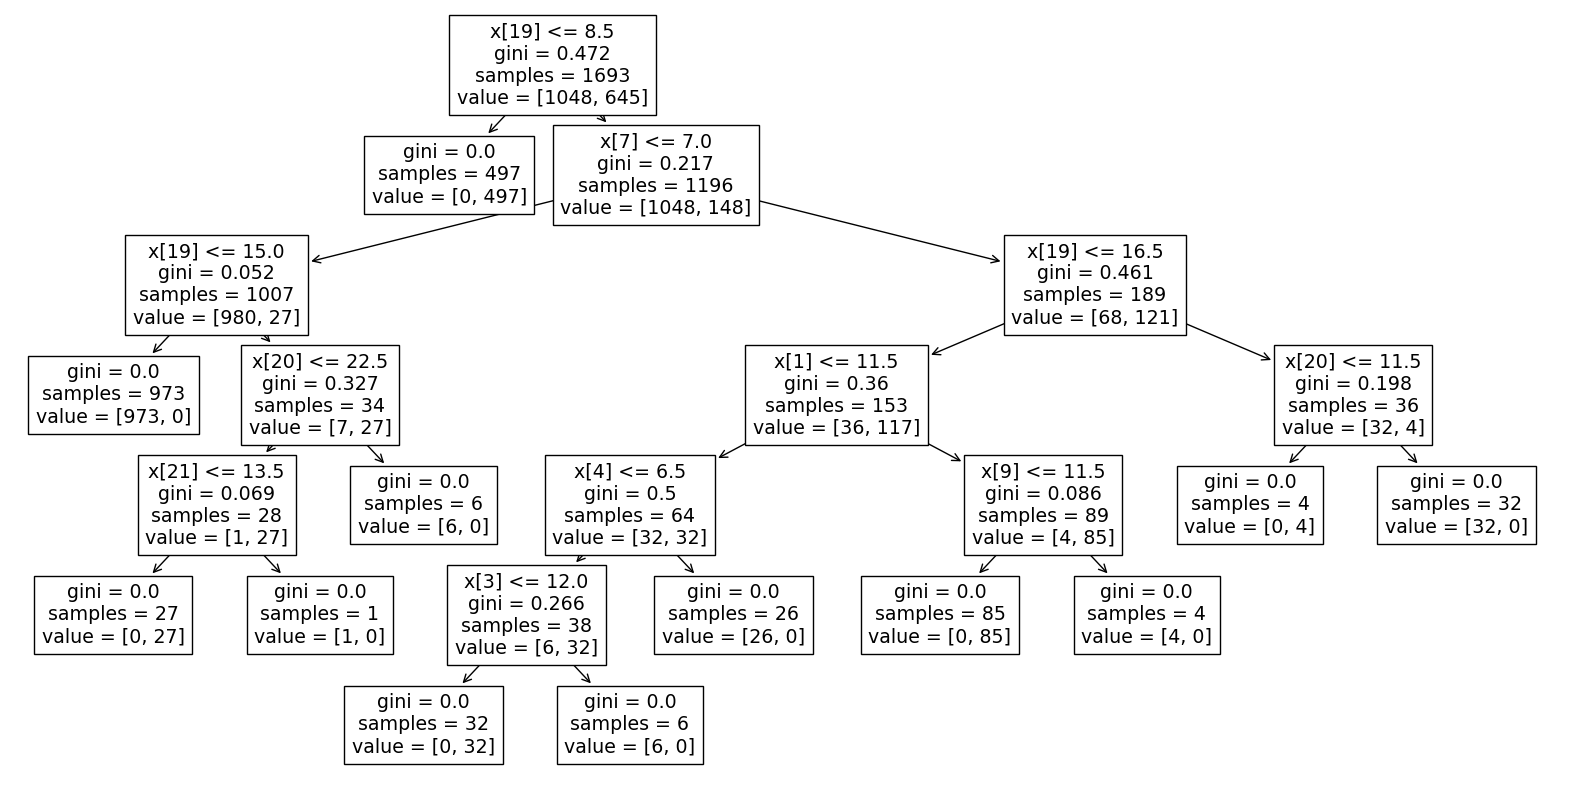

In [8]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(values_train, answers_train)

_fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(decision_tree, ax=ax)
plt.show()

In [9]:
# Let's see the score
print(f"{round(decision_tree.score(values_test, answers_test) * 100, 2)}%")

100.0%


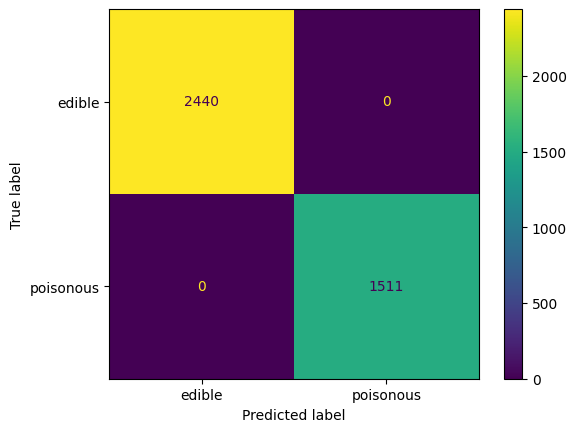

In [10]:
# And the confusion matrix
predictions = decision_tree.predict(values_test)
confusionMatrix = confusion_matrix(answers_test, predictions)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()


It's pretty damn accurate if I can say so. 99.97% (In some runs it get 100%) of correctness.
But what will happens if we constrain our tree to max depth of 5?


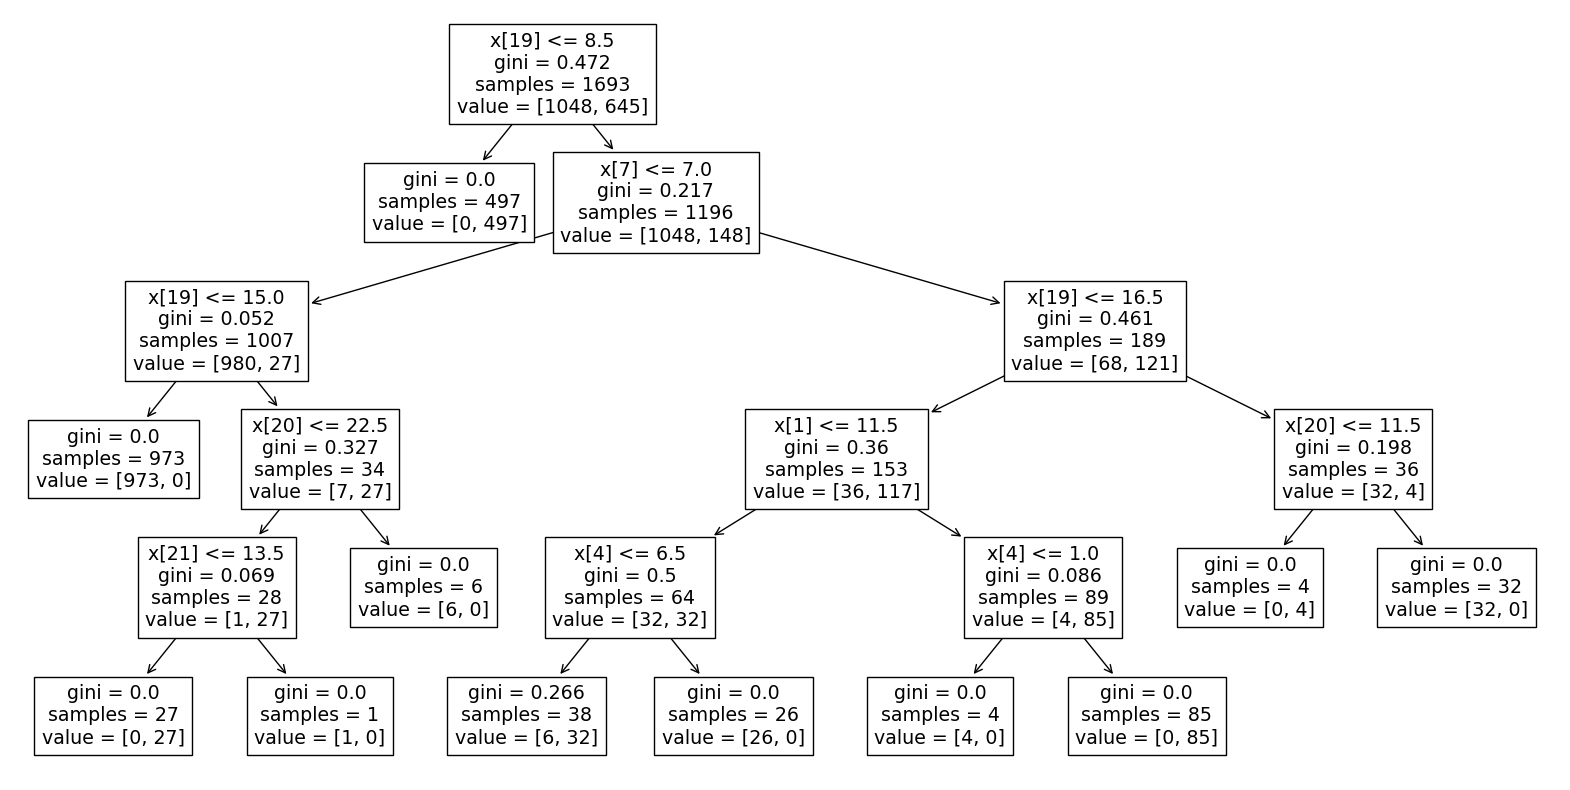

In [11]:
decision_tree = tree.DecisionTreeClassifier(max_depth=5)
decision_tree = decision_tree.fit(values_train, answers_train)

_, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(decision_tree, ax=ax)
plt.show()

In [12]:
print(f"{round(decision_tree.score(values_test, answers_test) * 100, 2)}%")

99.54%


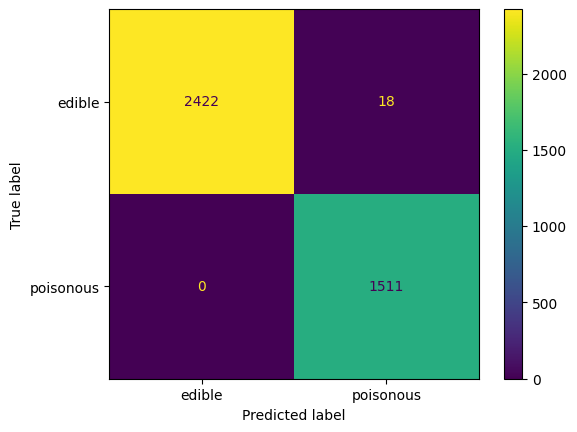

In [13]:
# Confusion matrix
predictions = decision_tree.predict(values_test)
confusionMatrix = confusion_matrix(answers_test, predictions)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()


Well it dropped in accuracy. But at least it's still over 99.5% accurate.


## 🔢 Naive Bayes Classification


In [14]:
model = GaussianNB()
model.fit(values_train, answers_train)
print(f"{round(model.score(values_test, answers_test) * 100, 2)}%")


71.4%


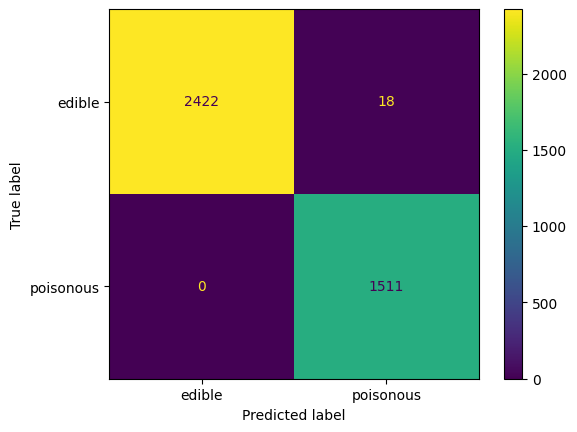

In [15]:
# confusion matrix
predictions = decision_tree.predict(values_test)
confusionMatrix = confusion_matrix(answers_test, predictions)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()


It does not look so hot. 😕

Well let's not concern ourselves with this and go further.


## 🙋🏻‍♂️ K Nearest Neighbours


In [16]:
# k nearest neighbours classification with 3 neighbours
k_neighbours = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
k_neighbours.fit(values_train, answers_train)

print(f"{round(k_neighbours.score(values_test, answers_test) * 100, 2)}%")

99.44%


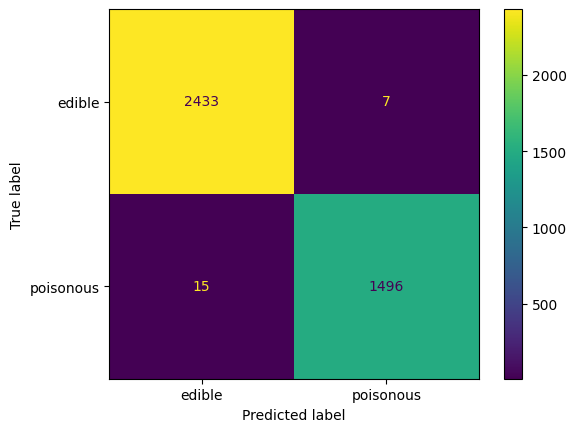

In [17]:
# confusion matrix
predictions = k_neighbours.predict(values_test)
confusionMatrix = confusion_matrix(answers_test, predictions)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()


In [18]:
# k nearest neighbours classification with 5 neighbours
k_neighbours = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
k_neighbours.fit(values_train, answers_train)

print(f"{round(k_neighbours.score(values_test, answers_test) * 100, 2)}%")


99.19%


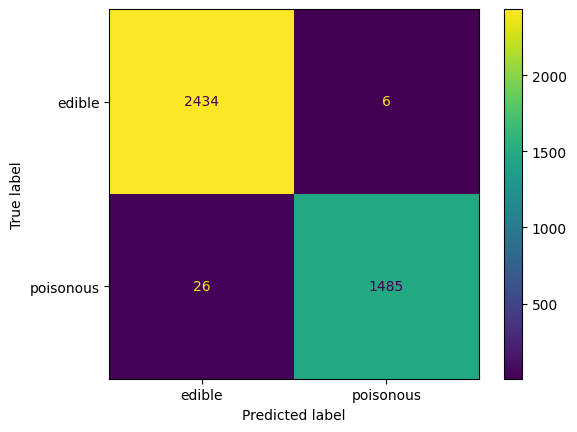

In [19]:
# confusion matrix
predictions = k_neighbours.predict(values_test)
confusionMatrix = confusion_matrix(answers_test, predictions)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()

## 🧠 Neural Networks


In [20]:
# Changing the values to floats
# To do that we will just divide the values by 25
# Since the greatest values is 24
values_train = values_train / 25
values_test = values_test / 25

values_train = tf.convert_to_tensor(values_train, dtype=tf.float64)
values_test = tf.convert_to_tensor(values_test, dtype=tf.float64)

# Changing the answers to floats of 0 and 1
# 1 is edible and 0 is poisonous
answers_train = answers_train.map(lambda x: 1 if x == 4 else 0)
answers_test = answers_test.map(lambda x: 1 if x == 4 else 0)

answers_train = tf.convert_to_tensor(answers_train, dtype=tf.float64)
answers_test = tf.convert_to_tensor(answers_test, dtype=tf.float64)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [21]:
# Creating the model
model = Sequential()
model.add(Dense(10, input_dim=values_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [22]:
# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [23]:
history = model.fit(values_train, answers_train, epochs=100,
                    verbose=0, validation_data=(values_test, answers_test))

2023-05-17 09:53:29.570699: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [24]:
# Accuracy of the neural network
predictions_train = model.predict(values_train).round()
print(f"{round(accuracy_score(predictions_train, answers_train) * 100, 2)}%")

predictions_test = model.predict(values_test).round()
print(f"{round(accuracy_score(predictions_test, answers_test) * 100, 2)}%")

53/53 [==============================] - 0s 2ms/step
99.82%
124/124 [==============================] - 0s 2ms/step
99.06%


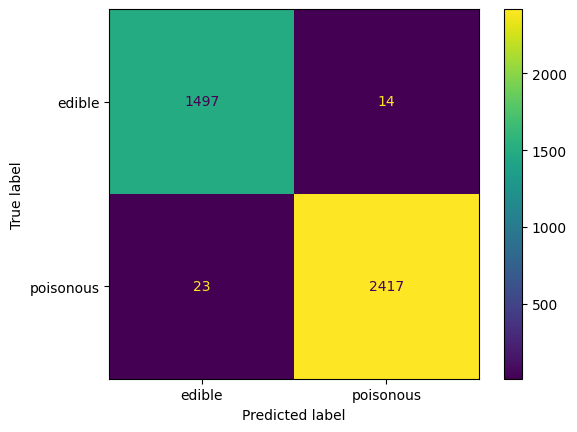

In [25]:
confusionMatrix = confusion_matrix(answers_test, predictions_test)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()

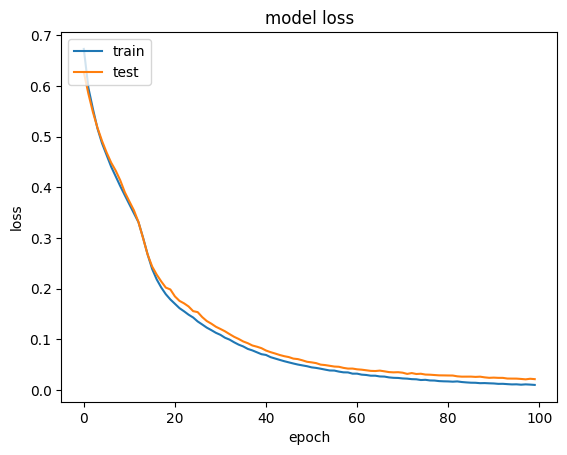

In [26]:
# Plotting the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()


We created a pretty accurate neural network. Not only it is accurate with over 95.5% accuracy. We didn't overtrain it! Or we can assume that because our train function does not lose accuracy.


In [27]:
# Let's create another model
model2 = Sequential()
model2.add(Dense(24, input_dim=values_train.shape[1], activation='selu'))
model2.add(Dense(12, activation='selu'))
model2.add(Dense(6, activation='selu'))
model2.add(Dense(1, activation='sigmoid'))


In [28]:
# Compiling the model
model2.compile(loss='binary_crossentropy',
               optimizer='adam', metrics=['accuracy'])


In [29]:
history2 = model2.fit(values_train, answers_train, epochs=100,
                      verbose=0, validation_data=(values_test, answers_test))


In [30]:
# Accuracy of the neural network
predictions_train2 = model2.predict(values_train).round()
print(f"{round(accuracy_score(predictions_train, answers_train) * 100, 2)}%")

predictions_test2 = model2.predict(values_test).round()
print(f"{round(accuracy_score(predictions_test2, answers_test) * 100, 2)}%")


53/53 [==============================] - 0s 3ms/step
99.82%
124/124 [==============================] - 0s 3ms/step
99.85%


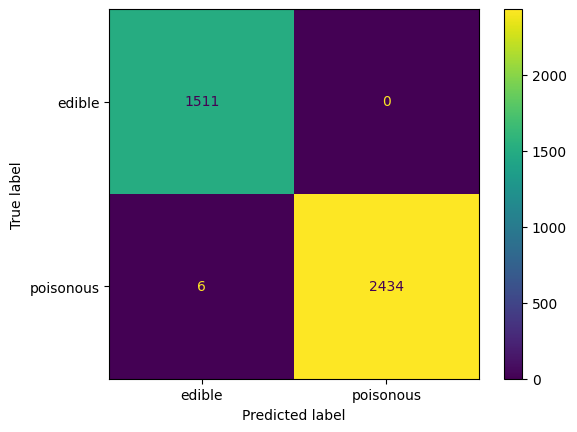

In [31]:
confusionMatrix = confusion_matrix(answers_test, predictions_test2)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()


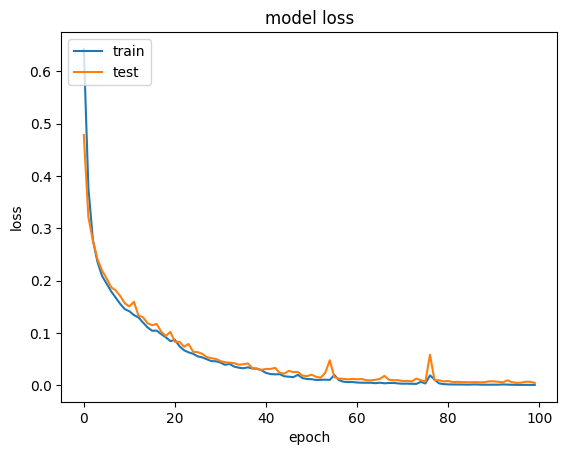

In [32]:
# Plotting the model loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()


For our different neural network we achieved 100% for testing and pretty much the same accuracy for train set as the previous neural network. But fitting the neural network took much longer since it's more complicated than the previous one.


## 2️⃣ Second DataSet

Now we will proceed to instead of deleting rows with missing data we will try to guess it somehow. We could do that in some sophisticated manner. Since I don't know how to do it, but I know how to use some of the AI algorithms we will create a model to guess the values.

We can do this since we have a lot of data points to base our guesses.


In [33]:
# Import the data once again
data = pd.read_csv('mushrooms.csv')

In [34]:
# We split the data to have only the values with missing stalk-root and those without
complete_values = data[data['stalk-root'] != '?']
missing_values = data[data['stalk-root'] == '?']


In [35]:
# Mapping over the values to change them to numbers
complete_values = complete_values.applymap(lambda s: ord(s))
missing_values = missing_values.applymap(lambda s: ord(s))

In [36]:
for column in complete_values.columns:
    print(
        f"Range of values for {column}: {complete_values[column].min()} - {complete_values[column].max()}")

Range of values for class: 101 - 112
Range of values for cap-shape: 98 - 120
Range of values for cap-surface: 102 - 121
Range of values for cap-color: 98 - 121
Range of values for bruises: 102 - 116
Range of values for odor: 97 - 112
Range of values for gill-attachment: 97 - 102
Range of values for gill-spacing: 99 - 119
Range of values for gill-size: 98 - 110
Range of values for gill-color: 103 - 121
Range of values for stalk-shape: 101 - 116
Range of values for stalk-root: 98 - 114
Range of values for stalk-surface-above-ring: 102 - 121
Range of values for stalk-surface-below-ring: 102 - 121
Range of values for stalk-color-above-ring: 98 - 121
Range of values for stalk-color-below-ring: 98 - 121
Range of values for veil-type: 112 - 112
Range of values for veil-color: 119 - 121
Range of values for ring-number: 110 - 116
Range of values for ring-type: 101 - 112
Range of values for spore-print-color: 104 - 119
Range of values for population: 97 - 121
Range of values for habitat: 100 - 1

In [37]:
values = complete_values.drop('stalk-root', axis=1)
answers = complete_values['stalk-root']

# We split our data into train and test data
values_train, values_test, answers_train, answers_test = train_test_split(
    values, answers, test_size=0.7, random_state=278805)
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(values_train, answers_train)


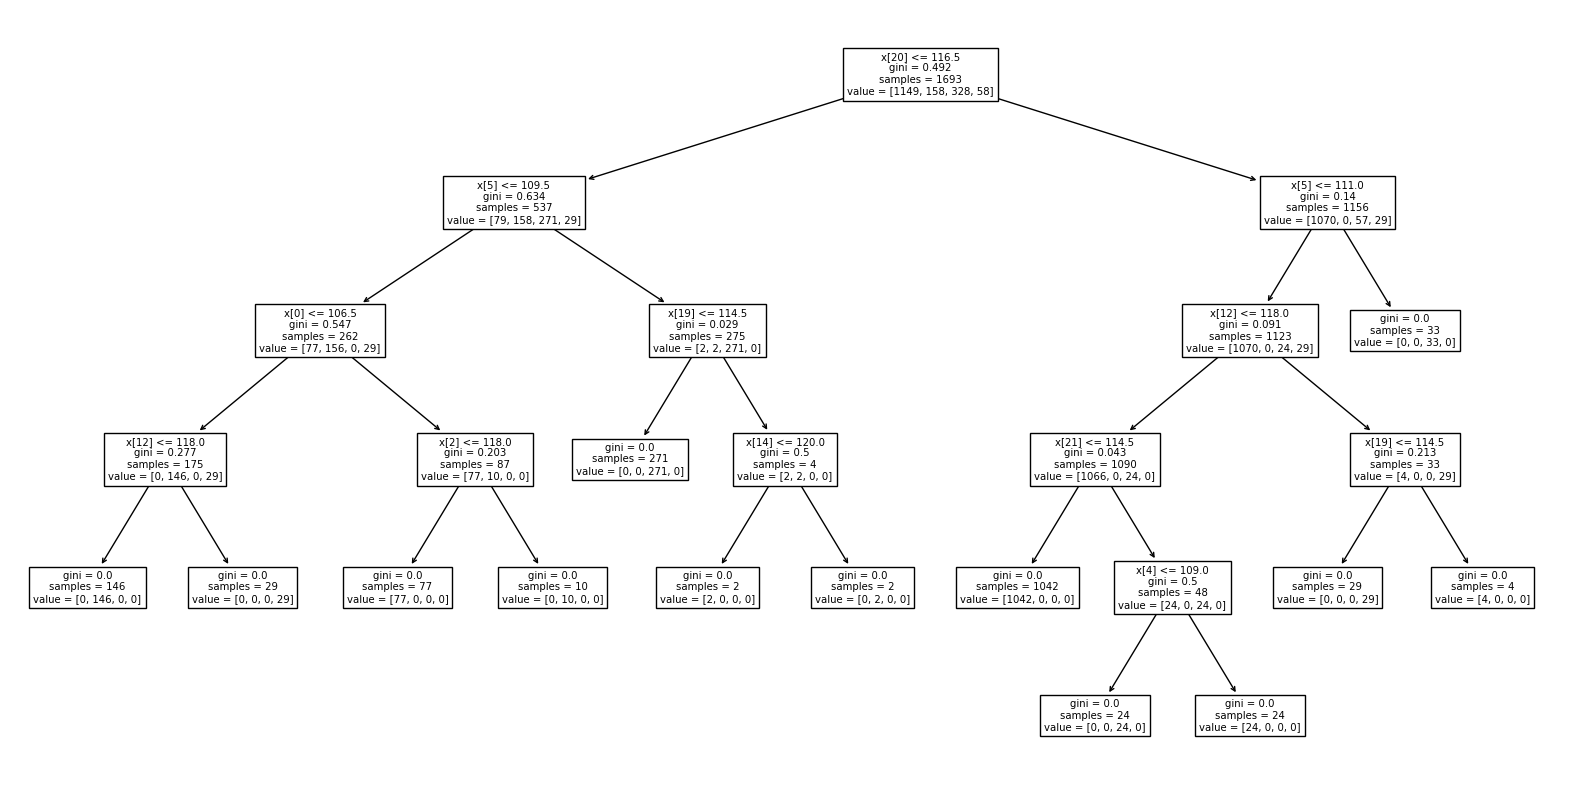

In [38]:
_fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(decision_tree, ax=ax)
plt.show()

In [39]:
# Let's see the score
print(f"{round(decision_tree.score(values_test, answers_test) * 100, 2)}%")

100.0%


Great now let's change our data set.


In [40]:
guessed_stalk_roots = decision_tree.predict(
    missing_values.drop('stalk-root', axis=1))

# add the guessed stalk roots to the missing_values
missing_values['stalk-root'] = guessed_stalk_roots

# add the missing_values to the complete_values
complete_values = pd.concat([complete_values, missing_values])

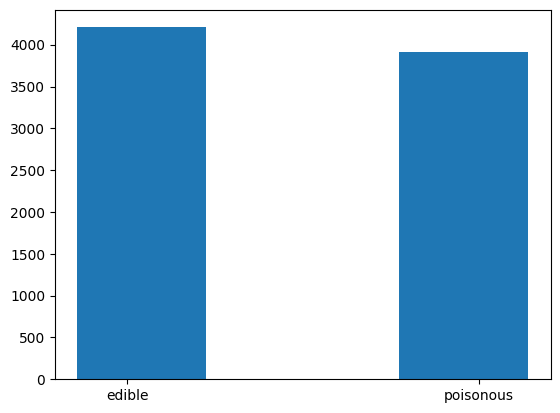

In [41]:
plt.hist(complete_values['class'], bins=2, rwidth=0.4)
plt.xticks([103.5, 109.5], ['edible', 'poisonous'])
plt.show()

Now our dataset is much bigger and we can continue to test our algorithms once again but with the new and better dataset.


In [42]:
values = complete_values.drop('class', axis=1)
answers = complete_values['class']

# We split our data into train and test data
values_train, values_test, answers_train, answers_test = train_test_split(
    values, answers, test_size=0.7, random_state=278805)

## 🌳 Performing tree classification


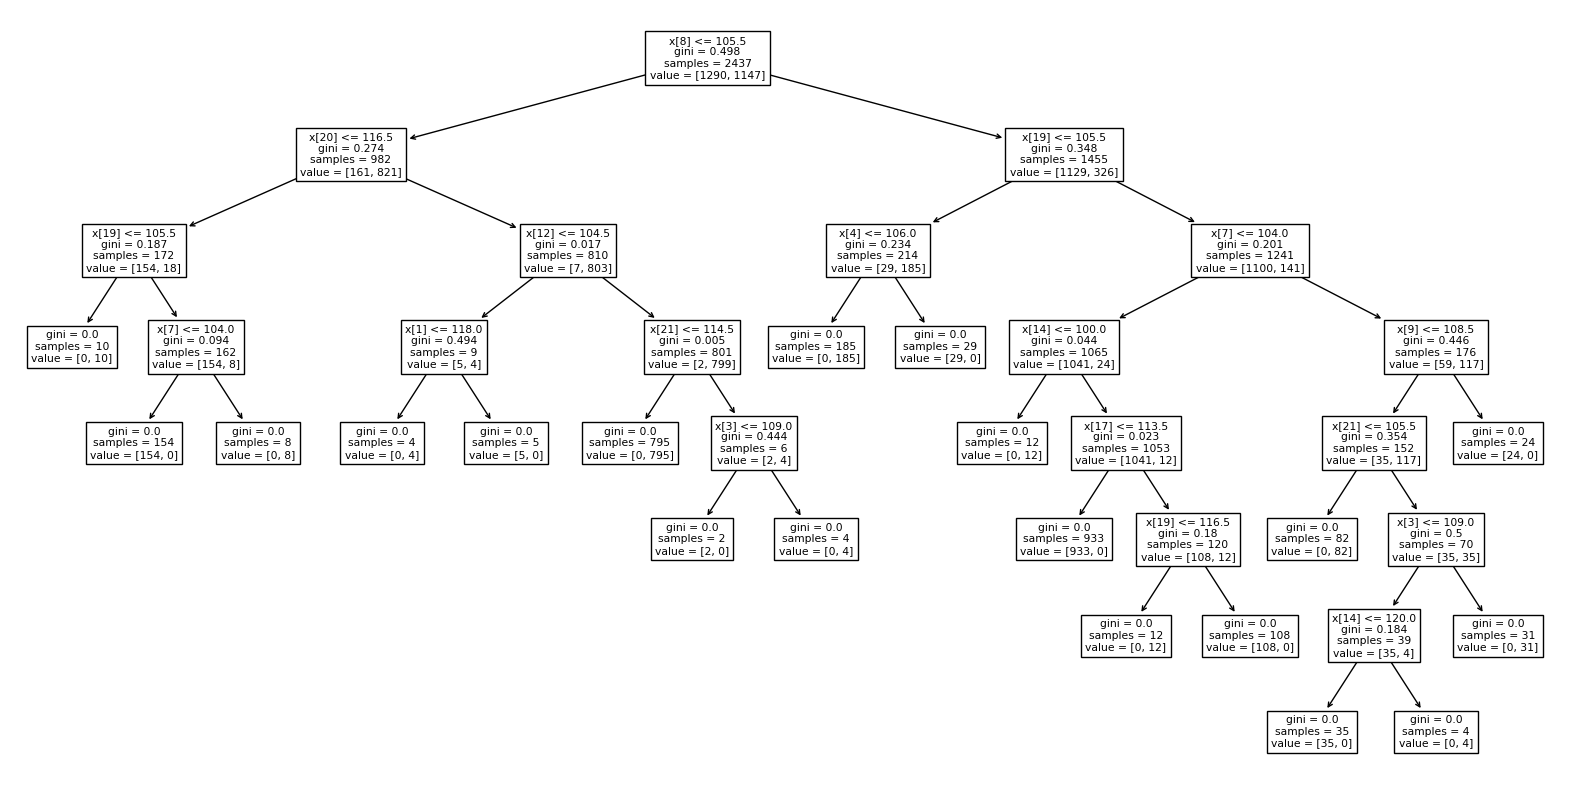

In [43]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(values_train, answers_train)

_fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(decision_tree, ax=ax)
plt.show()

In [44]:
# Let's see the score
print(f"{round(decision_tree.score(values_test, answers_test) * 100, 2)}%")

100.0%


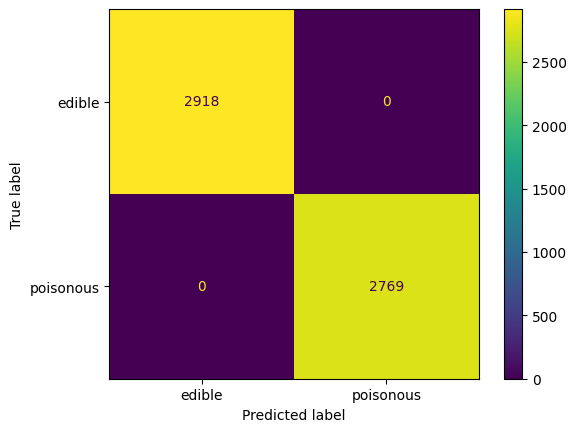

In [45]:
# And the confusion matrix
predictions = decision_tree.predict(values_test)
confusionMatrix = confusion_matrix(answers_test, predictions)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()


Our decision tree became more complex. and it's accuracy improved.


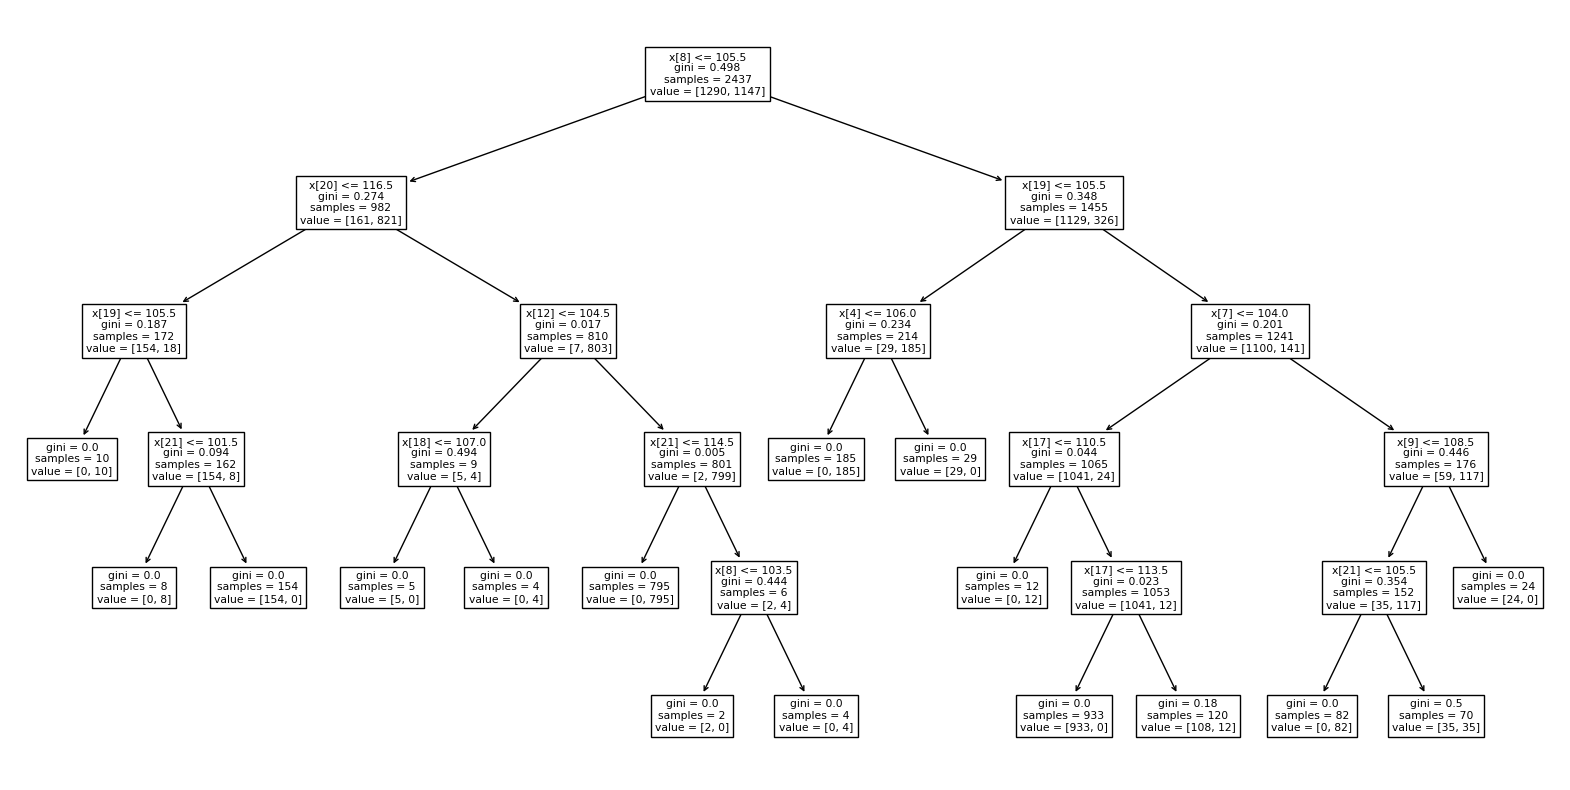

In [46]:
decision_tree = tree.DecisionTreeClassifier(max_depth=5)
decision_tree = decision_tree.fit(values_train, answers_train)

_, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(decision_tree, ax=ax)
plt.show()

In [47]:
print(f"{round(decision_tree.score(values_test, answers_test) * 100, 2)}%")

97.45%


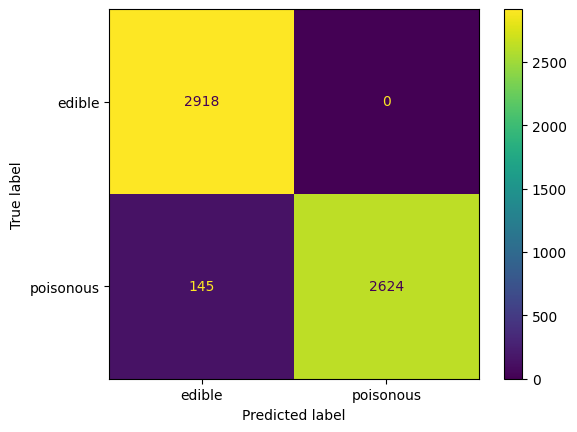

In [48]:
predictions = decision_tree.predict(values_test)
confusionMatrix = confusion_matrix(answers_test, predictions)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()


Previously both our trees were pretty similar but this time our second tree is less accurate.


## 🔢 Naive Bayes Classification


In [49]:
model = GaussianNB()
model.fit(values_train, answers_train)
print(f"{round(model.score(values_test, answers_test) * 100, 2)}%")


88.25%


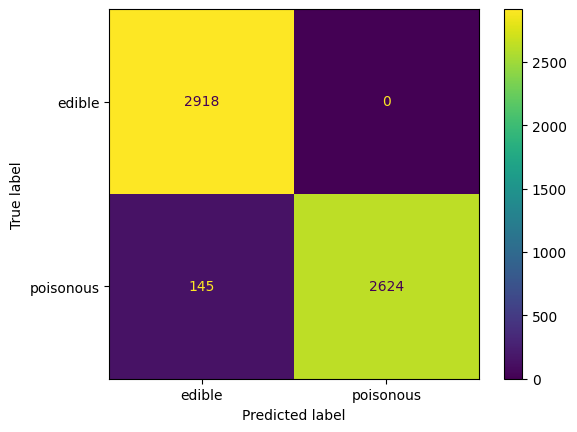

In [50]:
# confusion matrix
predictions = decision_tree.predict(values_test)
confusionMatrix = confusion_matrix(answers_test, predictions)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()


Our Naive Bayes also improved.


## 🙋🏻‍♂️ K Nearest Neighbours


In [51]:
# k nearest neighbours classification with 3 neighbours
k_neighbours = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
k_neighbours.fit(values_train, answers_train)

print(f"{round(k_neighbours.score(values_test, answers_test) * 100, 2)}%")

99.68%


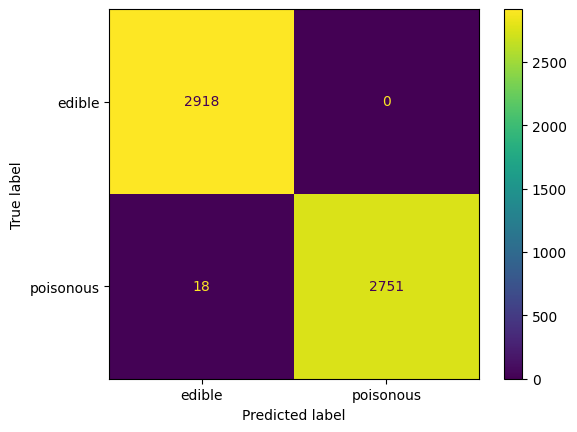

In [52]:
# confusion matrix
predictions = k_neighbours.predict(values_test)
confusionMatrix = confusion_matrix(answers_test, predictions)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()


In [53]:
# k nearest neighbours classification with 5 neighbours
k_neighbours = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
k_neighbours.fit(values_train, answers_train)

print(f"{round(k_neighbours.score(values_test, answers_test) * 100, 2)}%")

99.42%


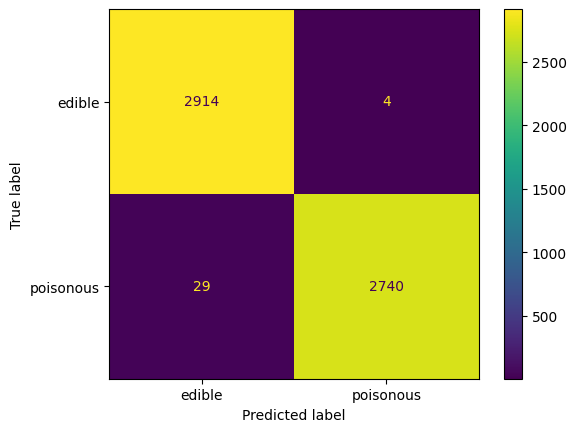

In [54]:
# confusion matrix
predictions = k_neighbours.predict(values_test)
confusionMatrix = confusion_matrix(answers_test, predictions)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()

## 🧠 Neural Networks


In [55]:
complete_values = complete_values.applymap(lambda num: num - ord('a'))
values = complete_values.drop('class', axis=1)
answers = complete_values['class']

# We split our data into train and test data
values_train, values_test, answers_train, answers_test = train_test_split(
    values, answers, test_size=0.7, random_state=278805)

In [56]:
# Changing the values to floats
# To do that we will just divide the values by 25
# Since the greatest values is 24
values_train = values_train / 25
values_test = values_test / 25

values_train = tf.convert_to_tensor(values_train, dtype=tf.float64)
values_test = tf.convert_to_tensor(values_test, dtype=tf.float64)

# Changing the answers to floats of 0 and 1
# 1 is edible and 0 is poisonous
answers_train = answers_train.map(lambda x: 1 if x == 4 else 0)
answers_test = answers_test.map(lambda x: 1 if x == 4 else 0)

answers_train = tf.convert_to_tensor(answers_train, dtype=tf.float64)
answers_test = tf.convert_to_tensor(answers_test, dtype=tf.float64)

In [57]:
# Creating the model
model = Sequential()
model.add(Dense(10, input_dim=values_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [58]:
# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [59]:
history = model.fit(values_train, answers_train, epochs=100,
                    verbose=0, validation_data=(values_test, answers_test))


In [60]:
# Accuracy of the neural network
predictions_train = model.predict(values_train).round()
print(f"{round(accuracy_score(predictions_train, answers_train) * 100, 2)}%")

predictions_test = model.predict(values_test).round()
print(f"{round(accuracy_score(predictions_test, answers_test) * 100, 2)}%")

77/77 [==============================] - 0s 2ms/step
99.63%
178/178 [==============================] - 0s 2ms/step
99.61%


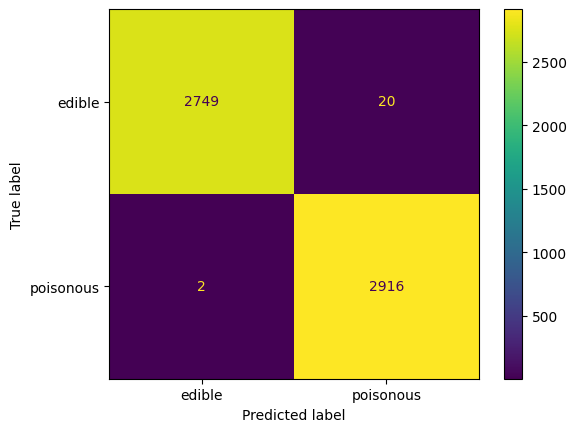

In [61]:
confusionMatrix = confusion_matrix(answers_test, predictions_test)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()

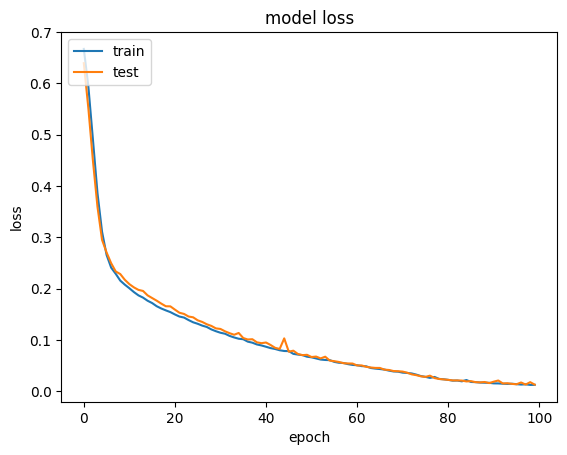

In [62]:
# Plotting the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()


This time we start at much lower loss. And also our network has not been overtrained.


In [63]:
# Let's create another model
model2 = Sequential()
model2.add(Dense(24, input_dim=values_train.shape[1], activation='selu'))
model2.add(Dense(12, activation='selu'))
model2.add(Dense(6, activation='selu'))
model2.add(Dense(1, activation='sigmoid'))


In [64]:
# Compiling the model
model2.compile(loss='binary_crossentropy',
               optimizer='adam', metrics=['accuracy'])

In [65]:
history2 = model2.fit(values_train, answers_train, epochs=100,
                      verbose=0, validation_data=(values_test, answers_test))


In [66]:
# Accuracy of the neural network
predictions_train = model2.predict(values_train).round()
print(f"{round(accuracy_score(predictions_train, answers_train) * 100, 2)}%")

predictions_test = model2.predict(values_test).round()
print(f"{round(accuracy_score(predictions_test, answers_test) * 100, 2)}%")

77/77 [==============================] - 0s 3ms/step
100.0%
178/178 [==============================] - 1s 3ms/step
99.93%


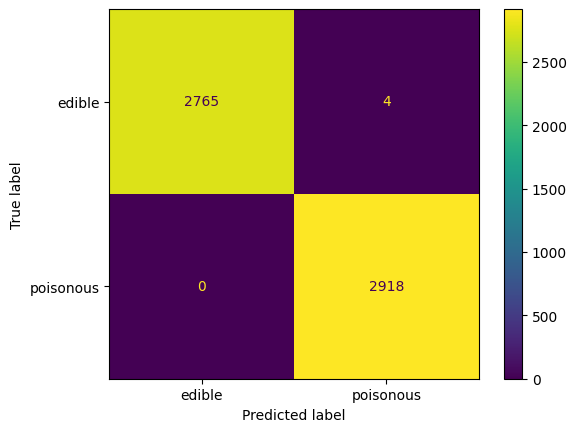

In [67]:
confusionMatrix = confusion_matrix(answers_test, predictions_test)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()

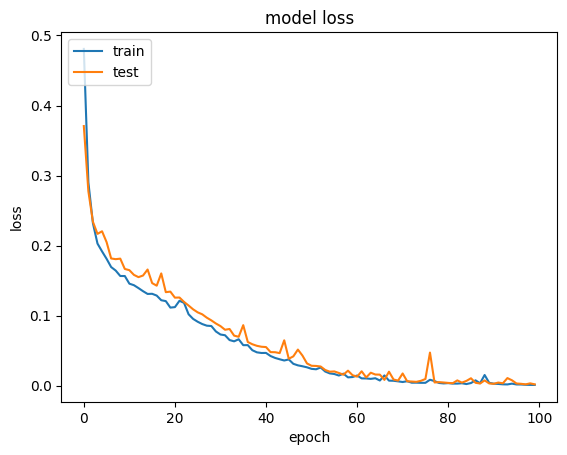

In [68]:
# Plotting the model loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()


For our second network we start of real high and continue to go down. This network is more accurate than the previous one.


## 3️⃣ Third DataSet

We played a little with two types of datasets, and now it's time for a third one! Now we will set every missing value in 'stalk-root' to -1 and see what happens.


In [69]:
# Import the data once again
data = pd.read_csv('mushrooms.csv')

In [70]:
data = data.applymap(lambda s: ord(s) - ord('a')
                     if ord(s) - ord('a') >= 0 else -1)

In [71]:
for column in data.columns:
    print(
        f"Range of values for {column}: {data[column].min()} - {data[column].max()}")


Range of values for class: 4 - 15
Range of values for cap-shape: 1 - 23
Range of values for cap-surface: 5 - 24
Range of values for cap-color: 1 - 24
Range of values for bruises: 5 - 19
Range of values for odor: 0 - 24
Range of values for gill-attachment: 0 - 5
Range of values for gill-spacing: 2 - 22
Range of values for gill-size: 1 - 13
Range of values for gill-color: 1 - 24
Range of values for stalk-shape: 4 - 19
Range of values for stalk-root: -1 - 17
Range of values for stalk-surface-above-ring: 5 - 24
Range of values for stalk-surface-below-ring: 5 - 24
Range of values for stalk-color-above-ring: 1 - 24
Range of values for stalk-color-below-ring: 1 - 24
Range of values for veil-type: 15 - 15
Range of values for veil-color: 13 - 24
Range of values for ring-number: 13 - 19
Range of values for ring-type: 4 - 15
Range of values for spore-print-color: 1 - 24
Range of values for population: 0 - 24
Range of values for habitat: 3 - 22


## 🌳 Performing tree classification


In [72]:
values = data.drop('class', axis=1)
answers = data['class']

# We split our data into train and test data
values_train, values_test, answers_train, answers_test = train_test_split(
    values, answers, test_size=0.7, random_state=278805)
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(values_train, answers_train)


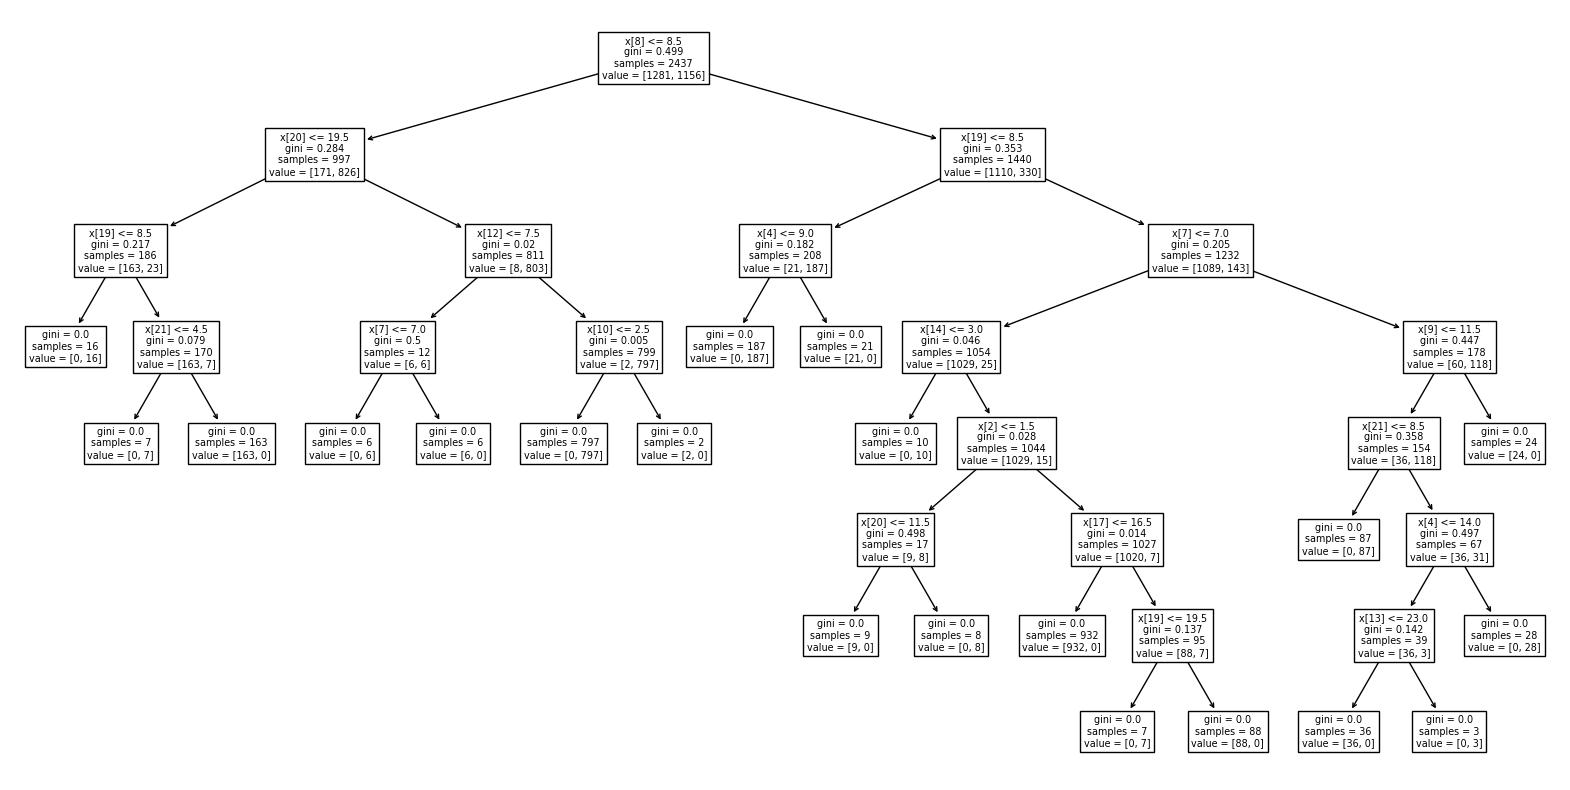

In [73]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(values_train, answers_train)

_fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(decision_tree, ax=ax)
plt.show()


In [74]:
print(f"{round(decision_tree.score(values_test, answers_test) * 100, 2)}%")


99.86%


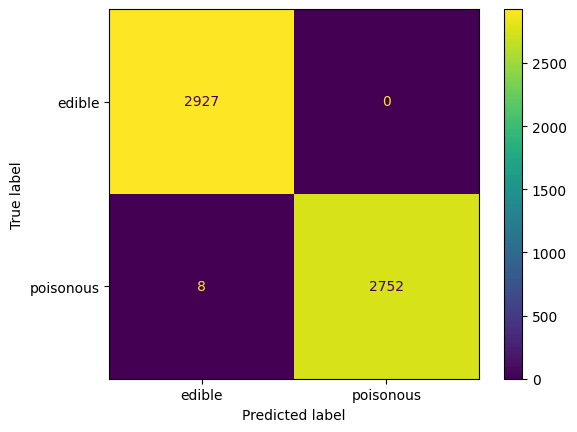

In [75]:
# And the confusion matrix
predictions = decision_tree.predict(values_test)
confusionMatrix = confusion_matrix(answers_test, predictions)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()


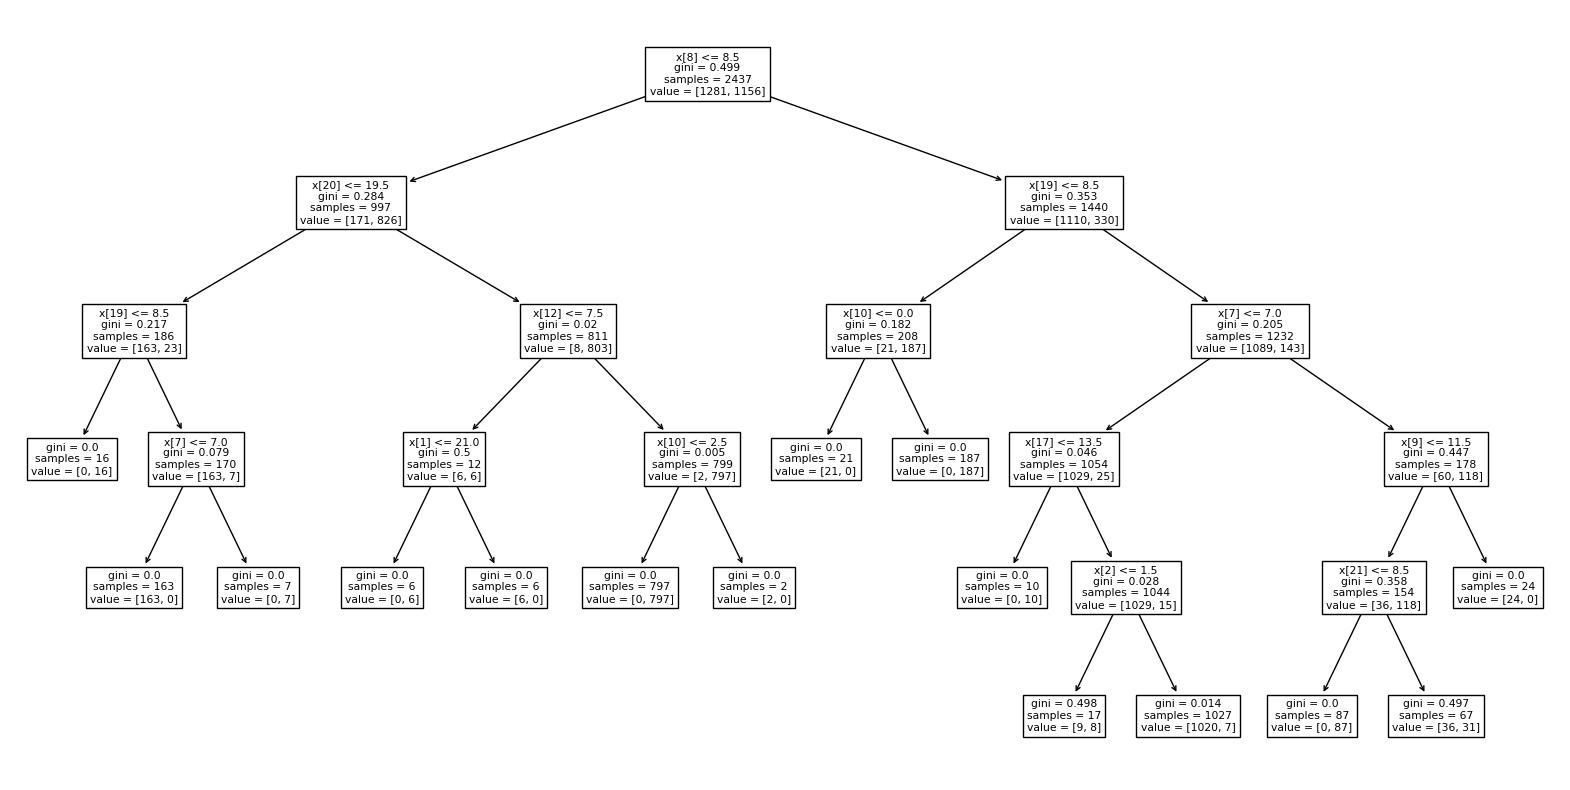

In [76]:
decision_tree = tree.DecisionTreeClassifier(max_depth=5)
decision_tree = decision_tree.fit(values_train, answers_train)

_, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(decision_tree, ax=ax)
plt.show()

In [77]:
print(f"{round(decision_tree.score(values_test, answers_test) * 100, 2)}%")


97.43%


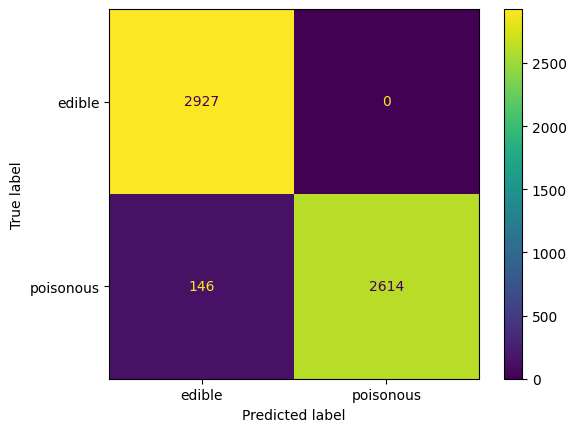

In [78]:
# And the confusion matrix
predictions = decision_tree.predict(values_test)
confusionMatrix = confusion_matrix(answers_test, predictions)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()


Aaaaaaaand not a lot has changed. But let's see if it continues.


## 🔢 Naive Bayes Classification


In [79]:
model = GaussianNB()
model.fit(values_train, answers_train)
print(f"{round(model.score(values_test, answers_test) * 100, 2)}%")

86.2%


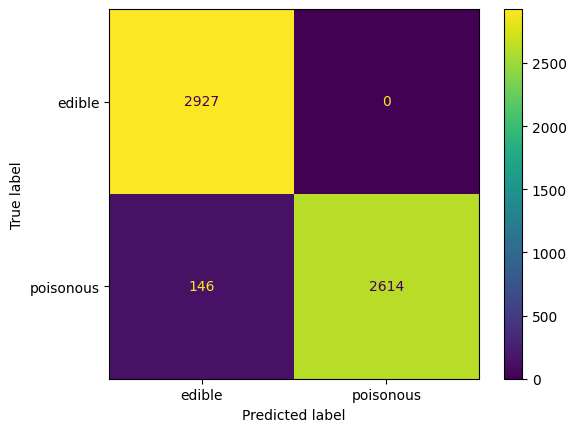

In [80]:
# confusion matrix
predictions = decision_tree.predict(values_test)
confusionMatrix = confusion_matrix(answers_test, predictions)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()


Our Naive Bayes also declined but not as much as in a scenario where we deleted the rows outright.


## 🙋🏻‍♂️ K Nearest Neighbours


In [81]:
# k nearest neighbours classification with 3 neighbours
k_neighbours = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
k_neighbours.fit(values_train, answers_train)

print(f"{round(k_neighbours.score(values_test, answers_test) * 100, 2)}%")

99.75%


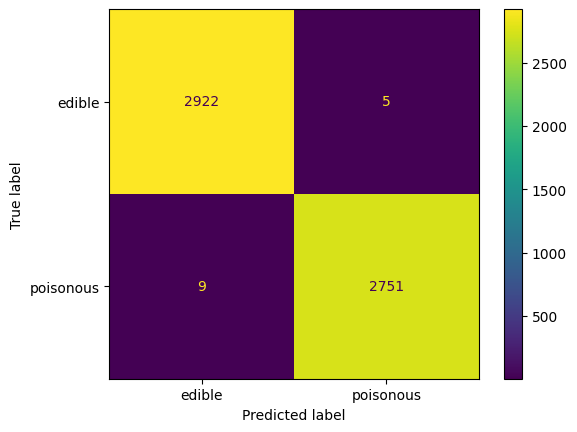

In [82]:
# confusion matrix
predictions = k_neighbours.predict(values_test)
confusionMatrix = confusion_matrix(answers_test, predictions)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()


In [83]:
# k nearest neighbours classification with 5 neighbours
k_neighbours = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
k_neighbours.fit(values_train, answers_train)

print(f"{round(k_neighbours.score(values_test, answers_test) * 100, 2)}%")

99.72%


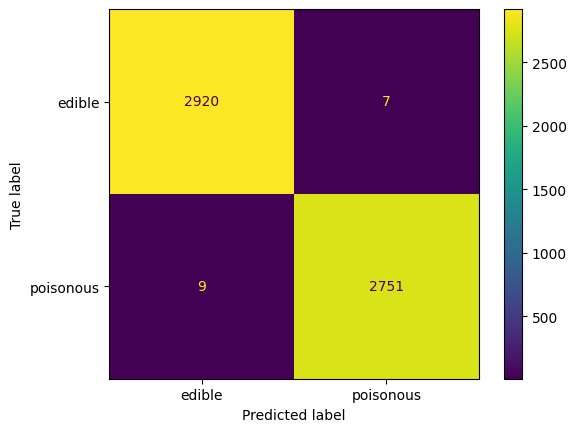

In [84]:
# confusion matrix
predictions = k_neighbours.predict(values_test)
confusionMatrix = confusion_matrix(answers_test, predictions)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()

K nearest neighbors improved slightly


## 🧠 Neural Networks


In [85]:
values_train = values_train / 25
values_test = values_test / 25

values_train.applymap(lambda value: 0 if value == -1 else value)
values_test.applymap(lambda value: 0 if value == -1 else value)

values_train = tf.convert_to_tensor(values_train, dtype=tf.float64)
values_test = tf.convert_to_tensor(values_test, dtype=tf.float64)


# Changing the answers to floats of 0 and 1
# 1 is edible and 0 is poisonous
answers_train = answers_train.map(lambda x: 1 if x == 4 else 0)
answers_test = answers_test.map(lambda x: 1 if x == 4 else 0)

answers_train = tf.convert_to_tensor(answers_train, dtype=tf.float64)
answers_test = tf.convert_to_tensor(answers_test, dtype=tf.float64)

In [86]:
model = Sequential()
model.add(Dense(10, input_dim=values_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [87]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])


In [88]:
history = model.fit(values_train, answers_train, epochs=100,
                    verbose=0, validation_data=(values_test, answers_test))


In [89]:
predictions_train = model.predict(values_train).round()
print(f"{round(accuracy_score(predictions_train, answers_train) * 100, 2)}%")

predictions_test = model.predict(values_test).round()
print(f"{round(accuracy_score(predictions_test, answers_test) * 100, 2)}%")


77/77 [==============================] - 0s 2ms/step
99.47%
178/178 [==============================] - 0s 2ms/step
99.1%


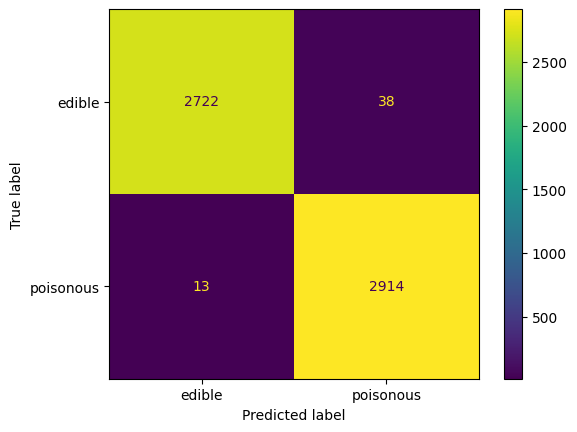

In [90]:
confusionMatrix = confusion_matrix(answers_test, predictions_test)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()

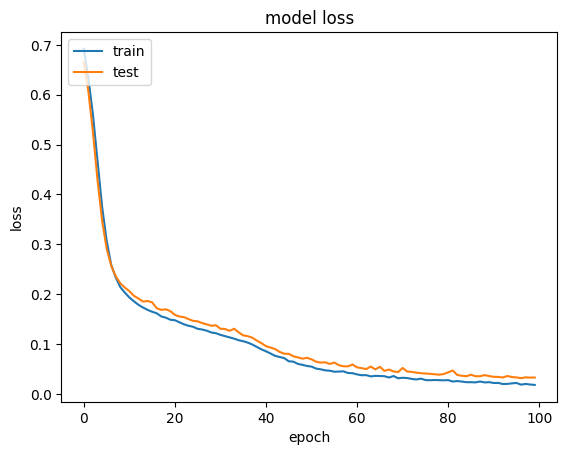

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()


We se a small decline in our first neural architecture.


In [92]:
model2 = Sequential()
model2.add(Dense(24, input_dim=values_train.shape[1], activation='selu'))
model2.add(Dense(12, activation='selu'))
model2.add(Dense(6, activation='selu'))
model2.add(Dense(1, activation='sigmoid'))


In [93]:
model2.compile(loss='binary_crossentropy',
               optimizer='adam', metrics=['accuracy'])


In [94]:
history2 = model2.fit(values_train, answers_train, epochs=100,
                      verbose=0, validation_data=(values_test, answers_test))


In [95]:
predictions_train = model2.predict(values_train).round()
print(f"{round(accuracy_score(predictions_train, answers_train) * 100, 2)}%")

predictions_test = model2.predict(values_test).round()
print(f"{round(accuracy_score(predictions_test, answers_test) * 100, 2)}%")


77/77 [==============================] - 0s 3ms/step
100.0%
178/178 [==============================] - 1s 3ms/step
99.86%


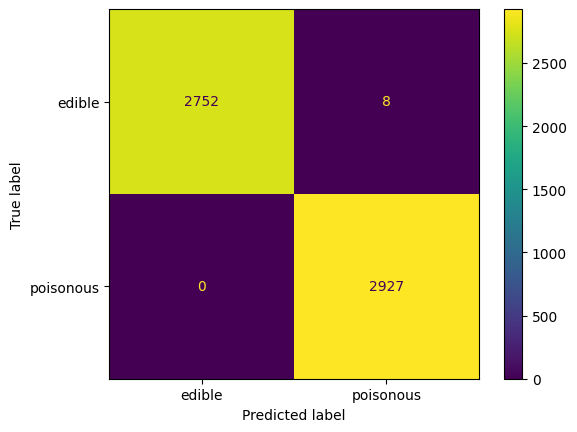

In [96]:
confusionMatrix = confusion_matrix(answers_test, predictions_test)
confusion_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=confusionMatrix, display_labels=['edible', 'poisonous'])
confusion_matrix_display.plot()


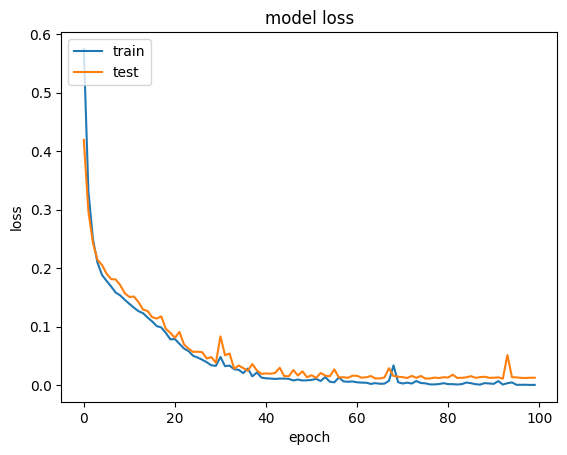

In [97]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()


And weirdly our second neural network wasn't much afflicted by setting the missing values to 0


## Summary

We went through different AI algorithms, to ask the same question "Is the mushroom edible". For different approaches we got different results. Naive Bayes turned out to be the lease accurate one for this problem. And the best turned out to be neural networks and decision trees. They are pretty much the same in case of accuracy.

We used the decision tree to aid us with creating bigger dataset which in the end turned out to be better for the problem.

Also changing our missing value to 0 didn't affect our algorithms much. Since it's been about 2400 records from 178 000 data points.
